In [30]:
import numpy as np
data = np.load('X.npy')
data.shape

(511, 45768)

In [31]:
data

array([[  0.        ,   0.        , 133.85530436, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  60.25514073, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 129.61462794, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        , 137.40093998, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 174.76644847, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  99.48646037, ...,   0.        ,
          0.        ,   0.        ]])

In [10]:
data.max()

75009.94311199295

In [32]:
print(np.max(data[:]))

75009.94311199295


In [33]:
np.where(data == data.max())

(array([66], dtype=int64), array([32023], dtype=int64))

In [34]:
print(data[:,32023].max())


75009.94311199295


## Transformation

In [7]:
# Transformation 
t_data = np.log2(data+1)
t_data.shape

(511, 45768)

In [9]:
t_data.max()

16.19481346078128

In [14]:
print(np.max(data[:,0]))

11.941397591320595


In [17]:
print(np.max(t_data[:32]))

15.914303681841055


In [36]:
np.where(t_data == t_data.max())

(array([66], dtype=int64), array([32023], dtype=int64))

In [ ]:
# as we can see the maximum element is in row 66 and column 32023

In [35]:
np.where(t_data == t_data.min())
# we have multiple minimum data points

(array([  0,   0,   0, ..., 510, 510, 510], dtype=int64),
 array([    0,     1,     4, ..., 45765, 45766, 45767], dtype=int64))

In [37]:
print(t_data[:,32023].max())

16.19481346078128


# PCA

In [38]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

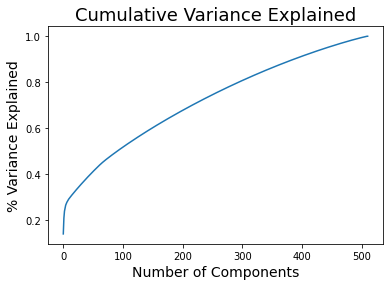

In [42]:
plt.plot(np.arange(0,511),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [43]:
# Number of PCs needed for raw data
np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]

338

In [45]:
pca2 = PCA(n_components = 50)

pca2.fit(t_data)

da = pca2.explained_variance_ratio_
print(da)

[0.13887565 0.06882332 0.03042886 0.01353755 0.01241041 0.00682649
 0.00579698 0.00485566 0.00462974 0.00405879 0.00350018 0.00344793
 0.00326833 0.00325551 0.00322423 0.00317578 0.00315188 0.0031037
 0.00309375 0.0030822  0.00306589 0.00305044 0.00303469 0.00302366
 0.00300563 0.00297365 0.00295162 0.00293709 0.00292534 0.00291322
 0.0028888  0.00287039 0.00286702 0.0028436  0.00281798 0.00280549
 0.00279746 0.0027735  0.00277041 0.00275058 0.00274039 0.00272845
 0.00271598 0.00268974 0.00266866 0.00266621 0.00263035 0.0026196
 0.0026033  0.00259038]


In [50]:
pca1 = PCA(n_components = 50)

pca1.fit(data)

va = pca1.explained_variance_ratio_
print(va)

[0.42779671 0.14804008 0.05785528 0.04294885 0.02411034 0.0167119
 0.01409453 0.01114905 0.00960092 0.00709494 0.00630011 0.00590574
 0.00513572 0.00492604 0.00441136 0.00432671 0.0038999  0.00371033
 0.00360068 0.00354081 0.00342198 0.00335462 0.00317404 0.00305029
 0.00297617 0.00293525 0.00282563 0.00279767 0.00273665 0.00269298
 0.00264578 0.00254268 0.00248388 0.00247463 0.00242609 0.00239331
 0.00235559 0.00232036 0.00220908 0.00220309 0.00214114 0.00211422
 0.0020864  0.00204968 0.001996   0.00197212 0.00195112 0.00193044
 0.0018604  0.00183027]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

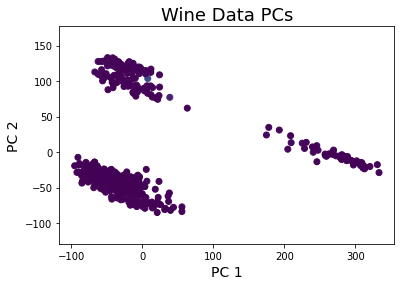

In [53]:
pca = PCA().fit(t_data)
pcs = pca.transform(t_data)
plt.scatter(pcs[:,0],pcs[:,1],c=pca.explained_variance_ratio_)
plt.title("Wine Data PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

In [56]:
from sklearn.manifold import MDS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

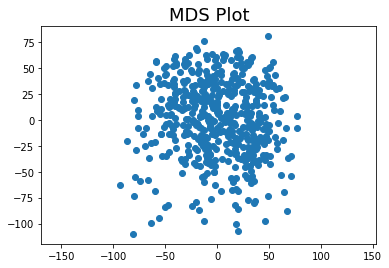

In [59]:
mds = MDS(n_components=50,verbose=1,eps=1e-5)
mds.fit(t_data)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()


In [60]:
from sklearn.manifold import TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.038s...
[t-SNE] Computed neighbors for 511 samples in 0.328s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 56.278090
[t-SNE] KL divergence after 250 iterations with early exaggeration: 144.766312
[t-SNE] KL divergence after 1000 iterations: 2.598202


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

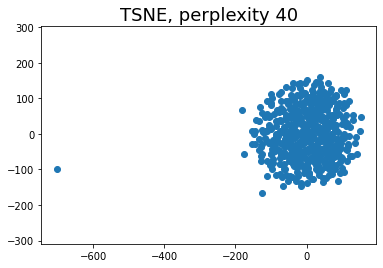

In [62]:
tsne = TSNE(n_components=3,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(t_data)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

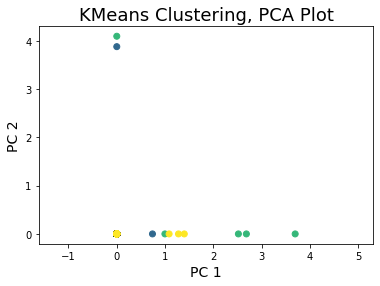

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_init=10)
y = kmeans.fit_predict(t_data)
plt.scatter(t_data[:,0],t_data[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

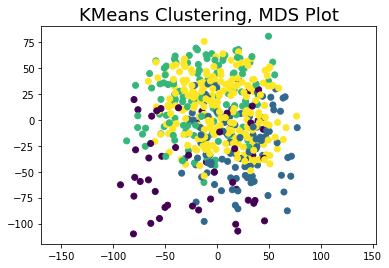

In [66]:
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=y)
plt.title("KMeans Clustering, MDS Plot",size=18)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

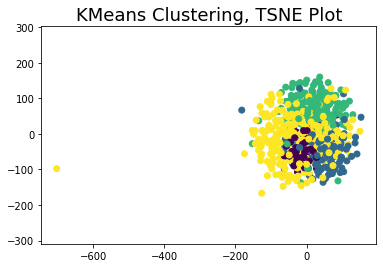

In [67]:
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("KMeans Clustering, TSNE Plot",size=18)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

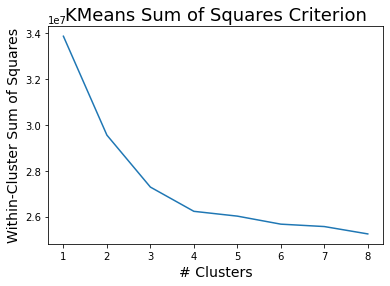

In [69]:
all_kmeans = [KMeans(n_clusters=i+1,n_init=10) for i in range(8)]
# i-th kmeans fits i+1 clusters
for i in range(8):
    all_kmeans[i].fit(t_data)

inertias = [all_kmeans[i].inertia_ for i in range(8)]
plt.plot(np.arange(1,9),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()